In [38]:
import pandas as pd
import numpy as np
import talib as ta
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib import rcParams
import random
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
data=pd.read_csv(r"C:\Users\mmehu\usa.csv")
RFC=RandomForestClassifier()

In [39]:
def Scaler(x):
    a=x-x.min()
    b=x.max()-x.min()
    c=-1+2*a/b
    return np.array(c)

In [40]:
data.head(40)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-11,1082.650024,1092.250000,1077.119995,1091.599976,1091.599976,4059280000
1,2010-06-14,1095.000000,1105.910034,1089.030029,1089.630005,1089.630005,4425830000
2,2010-06-15,1091.209961,1115.589966,1091.209961,1115.229980,1115.229980,4644490000
3,2010-06-16,1114.020020,1118.739990,1107.130005,1114.609985,1114.609985,5002600000
4,2010-06-17,1115.979980,1117.719971,1105.869995,1116.040039,1116.040039,4557760000
5,2010-06-18,1116.160034,1121.010010,1113.930054,1117.510010,1117.510010,4555360000
6,2010-06-21,1122.790039,1131.229980,1108.239990,1113.199951,1113.199951,4514360000
7,2010-06-22,1113.900024,1118.500000,1094.180054,1095.310059,1095.310059,4514380000
8,2010-06-23,1095.569946,1099.640015,1085.310059,1092.040039,1092.040039,4526150000
9,2010-06-24,1090.930054,1090.930054,1071.599976,1073.689941,1073.689941,4814830000


In [41]:
data=data.replace(0.0,np.NAN)

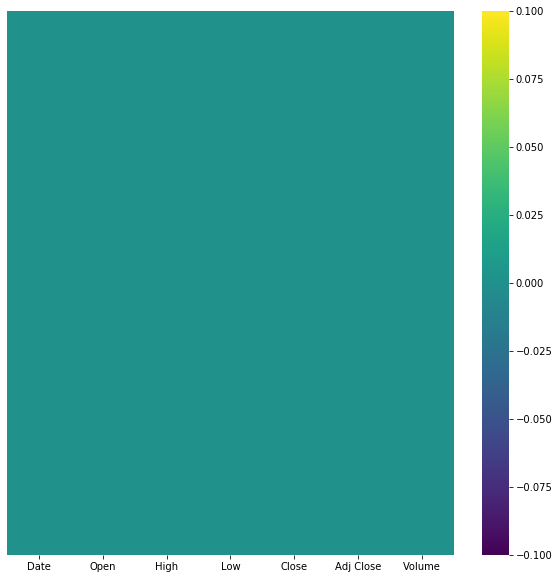

In [42]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

In [43]:
#data.fillna(data.mean(), inplace=True)

In [44]:
#data.head(40)

In [45]:
high=data.High
low=data.Low
open=data.Open
close=data.Close
date=data.Date

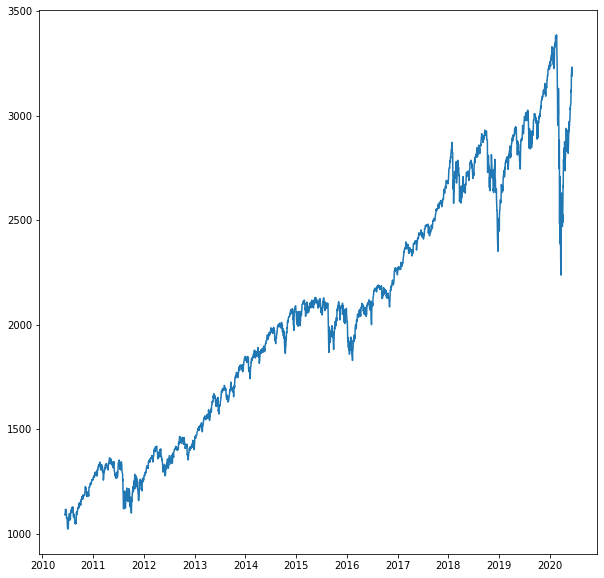

In [46]:
dict={"Date":date,"Close":close}
ts=pd.DataFrame(data=dict)
ts['Date'] = pd.to_datetime(ts['Date'], format="%Y/%m/%d")
ts.set_index(ts["Date"],drop=True,inplace=True)
ts.drop(["Date"],axis=1,inplace=True)
rcParams['figure.figsize']=10,10
plt.plot(ts);

# INDICATORS

In [47]:
sma=ta.SMA(close, 20)
ema=ta.EMA(close, 12)
macd, macdsignal, macdhist=ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9) #MACD>MSIG= BUY signal
rsi=ta.RSI(close, timeperiod=14)
willr=ta.WILLR(high, low, close) #above -20 overbought below -80 oversold
slowk,slowd=ta.STOCH(high,low,close,fastk_period=14)
roc = ta.ROC(close, timeperiod=10)
trix = ta.TRIX(close, timeperiod=5)
sar=ta.SAR(high,low)
cci=ta.CCI(high,low,close)
atr=ta.ATR(high,low,close,timeperiod=14)
adx=ta.ADX(high,low,close,timeperiod=14)

In [48]:
dict={"Close":close,"SMA":sma, "EMA":ema,"MACD":macd, 
      "RSI":rsi,"WillR":willr,"Slowk":slowk,"Slowd":slowd,"ROC":roc,"TRIX":trix,'SAR':sar,'CCI':cci,'ATR':atr,'ADX':adx}
featuredata=pd.DataFrame(data=dict)
featuredata.dropna(inplace=True)


In [49]:
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX
33,1101.530029,1078.713504,1094.647971,4.069988,55.092224,-30.310502,78.487130,87.653655,0.460569,0.301052,1082.441475,68.293521,18.661016,15.820351
34,1101.599976,1082.425003,1095.717510,4.516487,55.116453,-30.201329,72.119095,79.732285,3.448273,0.241287,1087.832662,36.790519,18.644510,15.077060
35,1125.859985,1087.589001,1100.354814,6.750109,62.644632,-2.044963,79.147735,76.584653,5.097782,0.266356,1088.010010,129.144609,19.148478,15.489965
36,1120.459961,1092.208997,1103.447913,7.992402,60.223287,-9.713269,86.013480,79.093437,3.413075,0.281469,1088.010010,109.703131,18.430728,15.873376
37,1127.239990,1095.557495,1107.108233,9.415484,62.198883,-2.101030,95.380246,86.847154,5.389918,0.301899,1094.296416,109.679406,17.777822,16.394305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,3112.350098,2968.681506,3031.552530,71.128265,67.447411,-5.917319,97.262671,96.975535,4.736153,0.560435,2946.820212,121.108066,57.038233,17.200919
2513,3193.929932,2984.318506,3056.533668,78.812688,72.481380,-5.972620,95.298301,96.789325,8.323523,0.633350,2972.596974,180.512934,60.061922,18.835157
2514,3232.389893,2999.447998,3083.588472,87.003128,74.484641,-0.238108,95.957318,96.172763,9.370483,0.728505,3010.856653,169.269657,58.571781,20.547026
2515,3207.179932,3013.297498,3102.602543,90.417600,70.844127,-8.663273,95.042000,95.432539,7.200083,0.745758,3050.865835,126.871376,57.193782,22.069727


In [50]:
featuredata["ups and downs"]=featuredata["Close"].shift(-1)-featuredata["Close"]
featuredata


,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs
33,1101.530029,1078.713504,1094.647971,4.069988,55.092224,-30.310502,78.487130,87.653655,0.460569,0.301052,1082.441475,68.293521,18.661016,15.820351,0.069947
34,1101.599976,1082.425003,1095.717510,4.516487,55.116453,-30.201329,72.119095,79.732285,3.448273,0.241287,1087.832662,36.790519,18.644510,15.077060,24.260009
35,1125.859985,1087.589001,1100.354814,6.750109,62.644632,-2.044963,79.147735,76.584653,5.097782,0.266356,1088.010010,129.144609,19.148478,15.489965,-5.400024
36,1120.459961,1092.208997,1103.447913,7.992402,60.223287,-9.713269,86.013480,79.093437,3.413075,0.281469,1088.010010,109.703131,18.430728,15.873376,6.780029
37,1127.239990,1095.557495,1107.108233,9.415484,62.198883,-2.101030,95.380246,86.847154,5.389918,0.301899,1094.296416,109.679406,17.777822,16.394305,-1.429931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,3112.350098,2968.681506,3031.552530,71.128265,67.447411,-5.917319,97.262671,96.975535,4.736153,0.560435,2946.820212,121.108066,57.038233,17.200919,81.579834
2513,3193.929932,2984.318506,3056.533668,78.812688,72.481380,-5.972620,95.298301,96.789325,8.323523,0.633350,2972.596974,180.512934,60.061922,18.835157,38.459961
2514,3232.389893,2999.447998,3083.588472,87.003128,74.484641,-0.238108,95.957318,96.172763,9.370483,0.728505,3010.856653,169.269657,58.571781,20.547026,-25.209961
2515,3207.179932,3013.297498,3102.602543,90.417600,70.844127,-8.663273,95.042000,95.432539,7.200083,0.745758,3050.865835,126.871376,57.193782,22.069727,-17.040039


In [51]:
featuredata["direction"]=featuredata.apply(lambda x:1 if x["ups and downs"]>0 else (-1 if x["ups and downs"]<0 else 0), axis=1) 
#featuredata["direction"]=featuredata.apply(lambda x:-1 if x["ups and downs"]<0 else 0, axis=1)
#featuredata.dropna(inplace=True)
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
33,1101.530029,1078.713504,1094.647971,4.069988,55.092224,-30.310502,78.487130,87.653655,0.460569,0.301052,1082.441475,68.293521,18.661016,15.820351,0.069947,1
34,1101.599976,1082.425003,1095.717510,4.516487,55.116453,-30.201329,72.119095,79.732285,3.448273,0.241287,1087.832662,36.790519,18.644510,15.077060,24.260009,1
35,1125.859985,1087.589001,1100.354814,6.750109,62.644632,-2.044963,79.147735,76.584653,5.097782,0.266356,1088.010010,129.144609,19.148478,15.489965,-5.400024,-1
36,1120.459961,1092.208997,1103.447913,7.992402,60.223287,-9.713269,86.013480,79.093437,3.413075,0.281469,1088.010010,109.703131,18.430728,15.873376,6.780029,1
37,1127.239990,1095.557495,1107.108233,9.415484,62.198883,-2.101030,95.380246,86.847154,5.389918,0.301899,1094.296416,109.679406,17.777822,16.394305,-1.429931,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,3112.350098,2968.681506,3031.552530,71.128265,67.447411,-5.917319,97.262671,96.975535,4.736153,0.560435,2946.820212,121.108066,57.038233,17.200919,81.579834,1
2513,3193.929932,2984.318506,3056.533668,78.812688,72.481380,-5.972620,95.298301,96.789325,8.323523,0.633350,2972.596974,180.512934,60.061922,18.835157,38.459961,1
2514,3232.389893,2999.447998,3083.588472,87.003128,74.484641,-0.238108,95.957318,96.172763,9.370483,0.728505,3010.856653,169.269657,58.571781,20.547026,-25.209961,-1
2515,3207.179932,3013.297498,3102.602543,90.417600,70.844127,-8.663273,95.042000,95.432539,7.200083,0.745758,3050.865835,126.871376,57.193782,22.069727,-17.040039,-1


In [52]:
featuredata=featuredata.reset_index(drop=True)
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
0,1101.530029,1078.713504,1094.647971,4.069988,55.092224,-30.310502,78.487130,87.653655,0.460569,0.301052,1082.441475,68.293521,18.661016,15.820351,0.069947,1
1,1101.599976,1082.425003,1095.717510,4.516487,55.116453,-30.201329,72.119095,79.732285,3.448273,0.241287,1087.832662,36.790519,18.644510,15.077060,24.260009,1
2,1125.859985,1087.589001,1100.354814,6.750109,62.644632,-2.044963,79.147735,76.584653,5.097782,0.266356,1088.010010,129.144609,19.148478,15.489965,-5.400024,-1
3,1120.459961,1092.208997,1103.447913,7.992402,60.223287,-9.713269,86.013480,79.093437,3.413075,0.281469,1088.010010,109.703131,18.430728,15.873376,6.780029,1
4,1127.239990,1095.557495,1107.108233,9.415484,62.198883,-2.101030,95.380246,86.847154,5.389918,0.301899,1094.296416,109.679406,17.777822,16.394305,-1.429931,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,3112.350098,2968.681506,3031.552530,71.128265,67.447411,-5.917319,97.262671,96.975535,4.736153,0.560435,2946.820212,121.108066,57.038233,17.200919,81.579834,1
2480,3193.929932,2984.318506,3056.533668,78.812688,72.481380,-5.972620,95.298301,96.789325,8.323523,0.633350,2972.596974,180.512934,60.061922,18.835157,38.459961,1
2481,3232.389893,2999.447998,3083.588472,87.003128,74.484641,-0.238108,95.957318,96.172763,9.370483,0.728505,3010.856653,169.269657,58.571781,20.547026,-25.209961,-1
2482,3207.179932,3013.297498,3102.602543,90.417600,70.844127,-8.663273,95.042000,95.432539,7.200083,0.745758,3050.865835,126.871376,57.193782,22.069727,-17.040039,-1


In [53]:
featuredata1=featuredata.dropna()
featuredata1

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
0,1101.530029,1078.713504,1094.647971,4.069988,55.092224,-30.310502,78.487130,87.653655,0.460569,0.301052,1082.441475,68.293521,18.661016,15.820351,0.069947,1
1,1101.599976,1082.425003,1095.717510,4.516487,55.116453,-30.201329,72.119095,79.732285,3.448273,0.241287,1087.832662,36.790519,18.644510,15.077060,24.260009,1
2,1125.859985,1087.589001,1100.354814,6.750109,62.644632,-2.044963,79.147735,76.584653,5.097782,0.266356,1088.010010,129.144609,19.148478,15.489965,-5.400024,-1
3,1120.459961,1092.208997,1103.447913,7.992402,60.223287,-9.713269,86.013480,79.093437,3.413075,0.281469,1088.010010,109.703131,18.430728,15.873376,6.780029,1
4,1127.239990,1095.557495,1107.108233,9.415484,62.198883,-2.101030,95.380246,86.847154,5.389918,0.301899,1094.296416,109.679406,17.777822,16.394305,-1.429931,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478,3122.870117,2955.484997,3016.862063,68.591865,68.957898,-2.215159,97.807003,95.083262,6.840037,0.553818,2916.847233,140.697037,58.464251,16.390778,-10.520019,-1
2479,3112.350098,2968.681506,3031.552530,71.128265,67.447411,-5.917319,97.262671,96.975535,4.736153,0.560435,2946.820212,121.108066,57.038233,17.200919,81.579834,1
2480,3193.929932,2984.318506,3056.533668,78.812688,72.481380,-5.972620,95.298301,96.789325,8.323523,0.633350,2972.596974,180.512934,60.061922,18.835157,38.459961,1
2481,3232.389893,2999.447998,3083.588472,87.003128,74.484641,-0.238108,95.957318,96.172763,9.370483,0.728505,3010.856653,169.269657,58.571781,20.547026,-25.209961,-1


In [54]:
#featuredata["Closelag1"]=featuredata.Close.shift(1)
#featuredata["Closelag2"]=featuredata.Close.shift(2)
#featuredata.dropna(inplace=True)

In [16]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
# Create a based model
RFC = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, verbose = 2)

In [17]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata1["direction"]
RescaledX=Scaler(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)

In [18]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.1min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 200}

In [22]:
RFC=RandomForestClassifier(bootstrap= True,
 max_depth= 110,
 max_features= 3,
 min_samples_leaf= 5,
 min_samples_split= 8,
 n_estimators= 200)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
accuracy_score(y_test,y_pred)



0.512751677852349

# GA for classifier

In [62]:
class GeneticSelector():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        #if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            #raise ValueError("The population size is not stable.")  
    
    def initialization(self):
        population=[]
        for i in range(self.size):  # size-no. of chromosomes in population
            chromosome=np.ones(self.n_features,dtype=np.bool) #makes an array of true
            mask=np.random.rand(len(chromosome))<0.3 #makes a boolean array when the value of the random int is <0.3 returns true.
            chromosome[mask]=False #when the mask array is having a true then at this position chromosome array is changed from true to false.
            population.append(chromosome)
        return population
    def fitness(self,population):
        scores=[]
        X, y = self.dataset
        X=pd.DataFrame(data=Scaler(X))
        X_train = X[:int(X.shape[0]*0.7)]
        X_test = X[int(X.shape[0]*0.7):]
        y_train = y[:int(X.shape[0]*0.7)]
        y_test = y[int(X.shape[0]*0.7):]
        for chromosome in population:
            try:
                self.estimator.fit(X_train.iloc[:,chromosome],y_train)
                predictions = self.estimator.predict(X_test.iloc[:,chromosome])            
                scores.append(accuracy_score(y_test,predictions))
            except:
                continue
        scores, population = np.array(scores), np.array(population) #to sort the scores list its converted to array
        inds=np.argsort(scores)[::-1] # reversed the order to get indices in descending order of the values.
        return list(scores[inds]), list(population[inds,:]) #sorted scores array is converted into list and the population of chromosomes is arranged according to scores
    
    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i]) #these are best selected parents
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted)) #these are randomly selected parents
        random.shuffle(population_next)
        return population_next    
    
    def crossover(self,population):  #adding  crossover  method to our class, which mixes the genes of the previously selected   n_best+n_rand  parents.
        population_next=[]
        for i in range(int(len(population)/2)): #is done as 2 parents(chromosomes) are reqd for a child.
            for j in range(self.n_children):
                chromosome1,chromosome2=population[i], population[len(population)-1-i]  #mating criteria is first and last parent from population.-1 is there because index starts from 0 whereas length starts from 1.
                child = chromosome1
                mask = np.random.rand(len(child))>0.5 # with 50% probability genes are mutated
                child[mask]=chromosome2[mask] #when mask is true the chromosome2 boolean values are put into the child with same indexes.
                population_next.append(child)
        return population_next
    
    def mutate(self,population):
        population_next=[]
        for i in range(len(population)):
            chromosome=population[i]
            if random.random()<self.mutation_rate: # 2 probabilites are involved here 1 is self mutation rate and other is 0.05.
                mask=np.random.rand(len(chromosome))<0.05
                chromosome[mask]=False
            population_next.append(chromosome)
        return population_next
    
    def generate(self,population):
        #selection crossover and mutation
        scores_sorted,population_sorted=self.fitness(population)
        population=self.select(population_sorted)
        population=self.crossover(population)
        population=self.mutate(population)
    
        #History ( saves the best results of each generation.)
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
    
        return population
    
    def fit(self,X,y): #pass data and perform genetic algorithm
        
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initialization()
        for i in range(self.n_gen):
            population = self.generate(population)            
        return self
    
    @property
    def support_(self): # returns a chromosome with the best features (the best chromosome from the last generation).
        return self.chromosomes_best[-1] 
 
    def plot_scores(self):
        plt.plot(self.scores_best, label='Best')
        plt.plot(self.scores_avg, label='Average')
        plt.legend(loc="best")
        plt.ylabel('Scores')
        plt.xlabel('Generation')
        plt.show()

In [63]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata1["direction"]

In [64]:
sel = GeneticSelector(estimator=RFC,n_gen=20, size=90, n_best=25, n_rand=25, 
                      n_children=25, mutation_rate=0.05)

In [65]:
sel.fit(X,y)

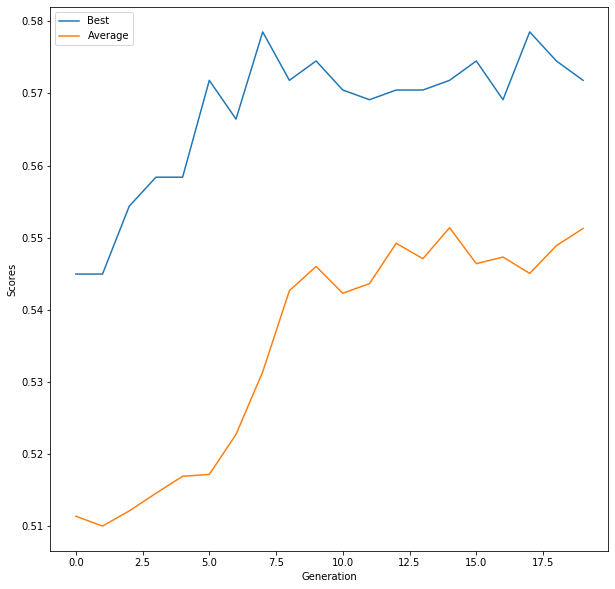

In [66]:
sel.plot_scores()

In [67]:
sel.scores_best

[0.5449664429530201,
 0.5449664429530201,
 0.5543624161073826,
 0.5583892617449664,
 0.5583892617449664,
 0.5718120805369128,
 0.5664429530201343,
 0.5785234899328859,
 0.5718120805369128,
 0.574496644295302,
 0.5704697986577181,
 0.5691275167785235,
 0.5704697986577181,
 0.5704697986577181,
 0.5718120805369128,
 0.574496644295302,
 0.5691275167785235,
 0.5785234899328859,
 0.574496644295302,
 0.5718120805369128]

In [68]:
sel.chromosomes_best

[array([ True,  True, False, False,  True, False,  True,  True,  True,
         True,  True,  True, False]),
 array([ True, False,  True,  True, False,  True,  True,  True, False,
         True,  True,  True,  True]),
 array([False, False,  True,  True, False,  True,  True,  True, False,
        False,  True,  True,  True]),
 array([False,  True, False, False, False, False,  True, False,  True,
         True,  True, False, False]),
 array([False, False, False,  True, False,  True,  True,  True, False,
        False, False, False, False]),
 array([False, False,  True,  True, False,  True,  True, False, False,
         True,  True, False,  True]),
 array([False,  True, False, False, False, False,  True, False,  True,
         True, False, False, False]),
 array([False, False, False, False, False, False,  True, False,  True,
         True, False, False, False]),
 array([False,  True, False, False, False, False,  True, False, False,
         True, False, False, False]),
 array([False, Fals

# PCA

In [30]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]


In [31]:
from sklearn.decomposition import PCA
pca= PCA(n_components=3)
x_pc=pca.fit_transform(X)

In [ ]:
df=pd.DataFrame(data=x_pc,columns=["PC1","PC2","PC3"])
df['direction']=featuredata1['direction']
df

In [ ]:
tscv = TimeSeriesSplit(n_splits=3)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
# Create a based model
RFC = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, verbose = 2)

In [ ]:
X=df[['PC1','PC2','PC3']]
y=df["direction"]
RescaledX=Scaler(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [496]:
RFC=RandomForestClassifier(bootstrap= True,
 max_depth= 90,
 max_features= 3,
 min_samples_leaf= 5,
 min_samples_split= 12,
 n_estimators= 100)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
accuracy_score(y_test,y_pred)
X=df[["PC1","PC2","PC3"]]
RescaledX=Scaler(X)
y=df["direction"]
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)
RFC.fit(X_train,y_train)
predictions = RFC.predict(X_test)            
accuracy_score(y_test,predictions)

0.5280437756497948

# PCA+GA

In [349]:
X=df[["PC1","PC2","PC3"]]
y=df["direction"]

In [196]:
sel1 = GeneticSelector(estimator=RFC,n_gen=40, size=20, n_best=5, n_rand=5, 
                      n_children=3, mutation_rate=0.05)

In [197]:
sel1.fit(X,y)

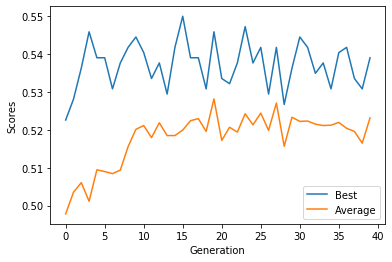

In [198]:
sel1.plot_scores()

In [199]:
sel1.scores_best

[0.5225718194254446,
 0.5280437756497948,
 0.5362517099863201,
 0.5458276333789329,
 0.5389876880984952,
 0.5389876880984952,
 0.53077975376197,
 0.5376196990424077,
 0.5417236662106704,
 0.5444596443228454,
 0.5403556771545828,
 0.533515731874145,
 0.5376196990424077,
 0.5294117647058824,
 0.5417236662106704,
 0.5499316005471956,
 0.5389876880984952,
 0.5389876880984952,
 0.53077975376197,
 0.5458276333789329,
 0.533515731874145,
 0.5321477428180574,
 0.5376196990424077,
 0.5471956224350205,
 0.5376196990424077,
 0.5417236662106704,
 0.5294117647058824,
 0.5417236662106704,
 0.5266757865937073,
 0.5362517099863201,
 0.5444596443228454,
 0.5417236662106704,
 0.5348837209302325,
 0.5376196990424077,
 0.53077975376197,
 0.5403556771545828,
 0.5417236662106704,
 0.533515731874145,
 0.53077975376197,
 0.5389876880984952]

# Direction

In [413]:
best_chromosome=[False, False,  True, False,  True, False, False,  True, False,
        False, False, False,  True, False, False]

In [414]:
X=featuredata[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX','Upper','Lower']]
y=featuredata['direction']

In [415]:
    X   = pd.DataFrame(data=Scaler(X))
X_train = X[:int(X.shape[0]*0.7)]
X_test  = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test  = y[int(X.shape[0]*0.7):]

In [416]:
RFC=RandomForestClassifier(bootstrap= True,
 max_depth= 100,
 max_features= 2,
 min_samples_leaf= 3,
 min_samples_split= 12,
 n_estimators= 100)

In [456]:
RFC.fit(X_train.iloc[:,best_chromosome],y_train)
predictions = RFC.predict(X_test.iloc[:,best_chromosome])  

In [418]:
predictions=pd.DataFrame(data=predictions,columns=['direction'])

In [419]:
y_test.tail(1),predictions.tail(1)

(2434    0
 Name: direction, dtype: int64,
      direction
 730         -1)

# Price

In [426]:
RFR=RandomForestRegressor(n_jobs=-1)

# GA for regression

In [436]:
class GeneticSelectorRegression():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        #if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            #raise ValueError("The population size is not stable.")  
    
    def initialization(self):
        population=[]
        for i in range(self.size):  # size-no. of chromosomes in population
            chromosome=np.ones(self.n_features,dtype=np.bool) #makes an array of true
            mask=np.random.rand(len(chromosome))<0.3 #makes a boolean array when the value of the random int is <0.3 returns true.
            chromosome[mask]=False #when the mask array is having a true then at this position chromosome array is changed from true to false.
            population.append(chromosome)
        return population
    def fitness(self,population):
        scores=[]
        X, y = self.dataset
        X=pd.DataFrame(data=Scaler(X))
        X_train = X[:int(X.shape[0]*0.7)]
        X_test = X[int(X.shape[0]*0.7):]
        y_train = y[:int(X.shape[0]*0.7)]
        y_test = y[int(X.shape[0]*0.7):]
        for chromosome in population:
            RFR.fit(X_train.iloc[:,chromosome],y_train)
            predictions = RFR.predict(X_test.iloc[:,chromosome])            
            scores.append(RFR.score)
        scores, population = np.array(scores), np.array(population) #to sort the scores list its converted to array
        inds=np.argsort(scores)[::-1] # reversed the order to get indices in descending order of the values.
        return list(scores[inds]), list(population[inds,:]) #sorted scores array is converted into list and the population of chromosomes is arranged according to scores
    
    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i]) #these are best selected parents
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted)) #these are randomly selected parents
        random.shuffle(population_next)
        return population_next    
    
    def crossover(self,population):  #adding  crossover  method to our class, which mixes the genes of the previously selected   n_best+n_rand  parents.
        population_next=[]
        for i in range(int(len(population)/2)): #is done as 2 parents(chromosomes) are reqd for a child.
            for j in range(self.n_children):
                chromosome1,chromosome2=population[i], population[len(population)-1-i]  #mating criteria is first and last parent from population.-1 is there because index starts from 0 whereas length starts from 1.
                child = chromosome1
                mask = np.random.rand(len(child))>0.5 # with 50% probability genes are mutated
                child[mask]=chromosome2[mask] #when mask is true the chromosome2 boolean values are put into the child with same indexes.
                population_next.append(child)
        return population_next
    
    def mutate(self,population):
        population_next=[]
        for i in range(len(population)):
            chromosome=population[i]
            if random.random()<self.mutation_rate: # 2 probabilites are involved here 1 is self mutation rate and other is 0.05.
                mask=np.random.rand(len(chromosome))<0.05
                chromosome[mask]=False
            population_next.append(chromosome)
        return population_next
    
    def generate(self,population):
        #selection crossover and mutation
        scores_sorted,population_sorted=self.fitness(population)
        population=self.select(population_sorted)
        population=self.crossover(population)
        population=self.mutate(population)
    
        #History ( saves the best results of each generation.)
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
    
        return population
    
    def fit(self,X,y): #pass data and perform genetic algorithm
        
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initialization()
        for i in range(self.n_gen):
            population = self.generate(population)            
        return self
    
    @property
    def support_(self): # returns a chromosome with the best features (the best chromosome from the last generation).
        return self.chromosomes_best[-1] 
 
    def plot_scores(self):
        plt.plot(self.scores_best, label='Best')
        plt.plot(self.scores_avg, label='Average')
        plt.legend(loc="best")
        plt.ylabel('Scores')
        plt.xlabel('Generation')
        plt.show()

In [440]:
sel2=GeneticSelectorRegression(estimator=RFC,n_gen=7, size=300, n_best=40, n_rand=40,
                               n_children=30, mutation_rate=0.05)

In [441]:
X=featuredata1[['Close','SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX']]
y=featuredata1['ups and downs']

In [442]:
sel2.fit(X,y)

TypeError: '<' not supported between instances of 'method' and 'method'

In [ ]:
sel2.plot_scores()

In [ ]:
sel2.scores_best